Corresponding video https://youtu.be/dghLs8hxh4w

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
def mse(a, b, prec=2):
    return np.round(mean_squared_error(a, b), prec)

# Generate data

In [4]:
# Generating 1 dimensional data

a = 5
b = 10
n_points = 300
x_min = 0.5
x_max = 4

X = np.linspace(x_min, x_max, n_points)[:, np.newaxis]
rs = np.random.RandomState(33)
noise = rs.normal(0, 5, (n_points, 1))

y = a + b * X + noise

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.33, random_state=33)

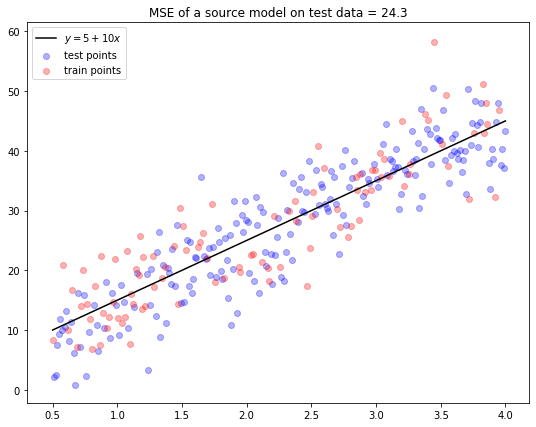

In [5]:
plt.figure(figsize=(9, 7))
plt.scatter(X_test, y_test, c='b', alpha=0.3, label='test points')
plt.scatter(X_train, y_train, c='r', alpha=0.3, label='train points')
plt.plot([0.5, 4], [10, 45], c='black', lw=1.5, label=f'$y = {a}+{b}x$');
plt.legend();
plt.title(f'MSE of a source model on test data = {np.round(mse(a+b*X_test, y_test), 2)}');

# 1. Linear model

$y = w_0 + w_1X_1 + w_2 X_2 + \ldots + w_k X_k$

---

$k = 1, X_1 = x$

$y = w_0 + w_1x$

In [6]:
from sklearn.linear_model import LinearRegression

Train MSE: 29.1 Test MSE: 25.0


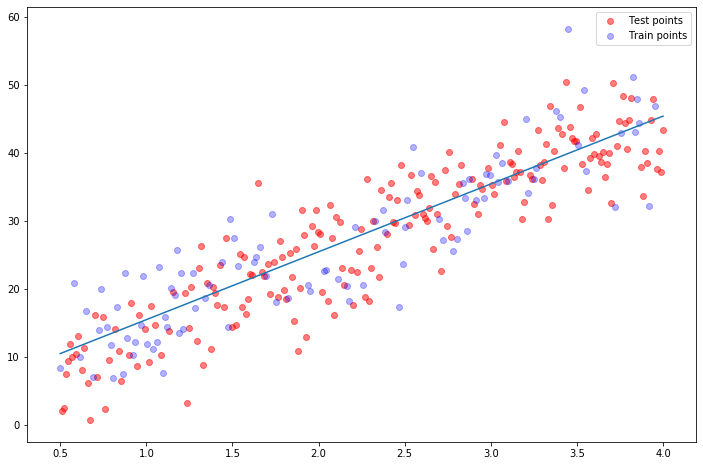

In [7]:
reg = LinearRegression()

# Train a model
reg.fit(X_train, y_train)

# Make predictions
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

# Compute an error
print('Train MSE:', mse(y_pred_train, y_train),
      'Test MSE:', mse(y_pred_test, y_test))

# Plot predicted model
X_linspace = np.linspace(0.5,4,200)[:, np.newaxis]
y_pred_linspace = reg.predict(X_linspace)

plt.figure(figsize=(12, 8))
plt.plot(X_linspace, y_pred_linspace)
plt.scatter(X_test, y_test, alpha=.5,c='r', label='Test points');
plt.scatter(X_train, y_train, alpha=.3, c='b', label='Train points');
plt.legend();

In [8]:
X_linspace

array([[0.5       ],
       [0.51758794],
       [0.53517588],
       [0.55276382],
       [0.57035176],
       [0.5879397 ],
       [0.60552764],
       [0.62311558],
       [0.64070352],
       [0.65829146],
       [0.6758794 ],
       [0.69346734],
       [0.71105528],
       [0.72864322],
       [0.74623116],
       [0.7638191 ],
       [0.78140704],
       [0.79899497],
       [0.81658291],
       [0.83417085],
       [0.85175879],
       [0.86934673],
       [0.88693467],
       [0.90452261],
       [0.92211055],
       [0.93969849],
       [0.95728643],
       [0.97487437],
       [0.99246231],
       [1.01005025],
       [1.02763819],
       [1.04522613],
       [1.06281407],
       [1.08040201],
       [1.09798995],
       [1.11557789],
       [1.13316583],
       [1.15075377],
       [1.16834171],
       [1.18592965],
       [1.20351759],
       [1.22110553],
       [1.23869347],
       [1.25628141],
       [1.27386935],
       [1.29145729],
       [1.30904523],
       [1.326

In [9]:
reg.coef_, reg.intercept_

(array([[9.9710629]]), array([5.53745896]))

### What if we add more (redundant) polynomial features, could we do better on train?

$y = w_0 + w_1X_1 + w_2 X_2 + \ldots + w_k X_k$

$k = 15, X_1 = x, X_2 = x^2, \ldots, X_{15}=x^{15}$

$$y = w_0 + w_1x + w_2 x^2 + \ldots + w_{15} x^{15} $$

In [10]:
from sklearn.preprocessing import PolynomialFeatures

In [11]:
poly = PolynomialFeatures(degree=15, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [12]:
reg = LinearRegression(fit_intercept=True)
reg.fit(X_train_poly, y_train)
y_pred_train = reg.predict(X_train_poly)
y_pred_test = reg.predict(X_test_poly)

print('Train MSE:', mse(y_pred_train, y_train),
      'Test MSE:', mse(y_pred_test, y_test))

Train MSE: 23.21 Test MSE: 30.13


### 1.1 Prediction curve

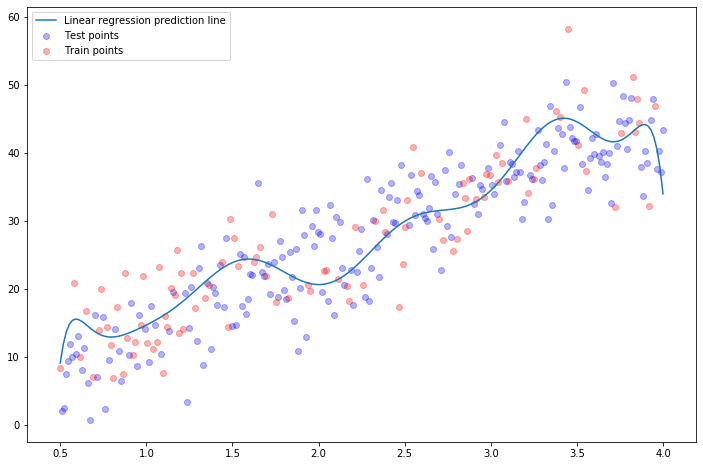

In [13]:
X_linspace_poly = poly.fit_transform(np.linspace(0.5,4,200).reshape(-1,1))
y_pred_linspace = reg.predict(X_linspace_poly)

plt.figure(figsize=(12, 8))
plt.plot(np.linspace(0.5,4,200), y_pred_linspace, label='Linear regression prediction line')
plt.scatter(X_test, y_test, alpha=.3,c='b', label = 'Test points');

plt.scatter(X_train, y_train, alpha=.3, c='r', label='Train points');
plt.legend();

In [14]:
reg.coef_

array([[ 4.05393997e+04, -1.36903176e+05,  2.48557076e+05,
        -2.41855898e+05,  6.44485242e+04,  1.47518188e+05,
        -2.32089586e+05,  1.81229040e+05, -9.19277396e+04,
         3.23015668e+04, -7.96812218e+03,  1.35903970e+03,
        -1.52981739e+02,  1.02419758e+01, -3.09251775e-01]])

### 1.2 Error curve

We know that originally data was produce from a linear law, but we are building a model as a polynom of 15th degree:

$$y = w_0 + w_1x + w_2 x^2 + \ldots + w_{15} x^{15} $$

What if we make some of the coefficients very small (ideally coefficients corresponded to all degrees higher than 1):

- Lasso
- Ridge
- Elastic Net (combination of Lasso and Ridge)


These models share the same idea: if we want to make some coefficient small, let's add their norm to the optimized function, so instead of regular MSE:

$$\sum(y - (w_0 + w_1 x))^2 \rightarrow \min_{\text{w.r. }w_i} $$

let's optimize the following:

$$\left[\sum_{i=1}^{n}(y - (w_0 + w_1 x))^2 + \frac{1}{\alpha}\sum_{j=1}^{k} ||w_i|| \right]\rightarrow \min_{\text{w.r. }w_i} $$

in case of Ridge regression the norm is l2:
$$||w_i|| = ||w_i||_{l_2}  = w_i^2,$$
and in case of Lasso regression the norm is l1:
$$||w_i|| = ||w_i||_{l_1} = |w_i|$$

and $\alpha$ is a regularization coefficient. Smaller values of $\alpha$ correspond to harder regularization.


> Typically, you want to change $\alpha$ on the log-scale, e.g. 0.003, 0.001, 0.03...

In [15]:
from sklearn.linear_model import Ridge, Lasso

In [16]:
test_error = []
train_error = []
weights = []
logspace = np.logspace(-6,1,20)

for alpha in logspace:
    reg = Ridge(fit_intercept=True, alpha=alpha)
    reg.fit(X_train_poly, y_train)
    y_pred_train = reg.predict(X_train_poly)
    y_pred_test = reg.predict(X_test_poly)
    
    train_error.append(mse(y_pred_train, y_train))
    test_error.append(mse(y_pred_test, y_test))
    weights.append(np.sum(reg.coef_**2))

/Users/dmitrii/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.19424e-22): result may not be accurate.
  overwrite_a=True).T
/Users/dmitrii/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.40314e-21): result may not be accurate.
  overwrite_a=True).T
/Users/dmitrii/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.01901e-20): result may not be accurate.
  overwrite_a=True).T
/Users/dmitrii/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.20391e-20): result may not be accurate.
  overwrite_a=True).T
/Users/dmitrii/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.99723e-20): result may not be accurate.
  overwrite_a=Tru

$$y = w_0 + w_1x + w_2 x^2 + \ldots + w_{15} x^{15} $$


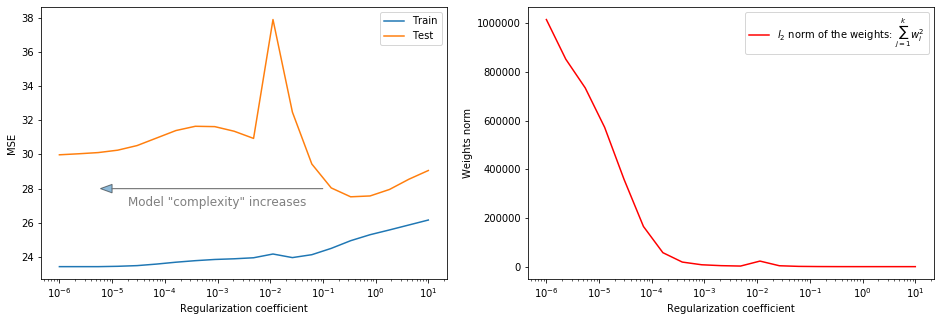

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
ax[0].plot(logspace, train_error, label='Train')
ax[0].plot(logspace, test_error, label='Test')
ax[0].set_xscale('log')
ax[0].legend();
ax[0].arrow(1e-1, 28, -(1e-1-1e-5), 0, head_width=0.5, head_length=.000004, alpha=.5);
ax[0].annotate('Model "complexity" increases', [2e-5, 27], size=12, alpha=0.5);
ax[0].set_xlabel('Regularization coefficient')
ax[0].set_ylabel('MSE')
ax[1].plot(logspace, weights, color='r', label='$l_2$ norm of the weights: $\sum_{j=1}^{k} w_i^2$')
ax[1].set_xscale('log')
ax[1].legend();
ax[1].set_ylabel('Weights norm')
ax[1].set_xlabel('Regularization coefficient');

In [18]:
np.argmin(test_error), logspace[np.argmin(test_error)]

(15, 0.3359818286283781)

/Users/dmitrii/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.99723e-20): result may not be accurate.
  overwrite_a=True).T


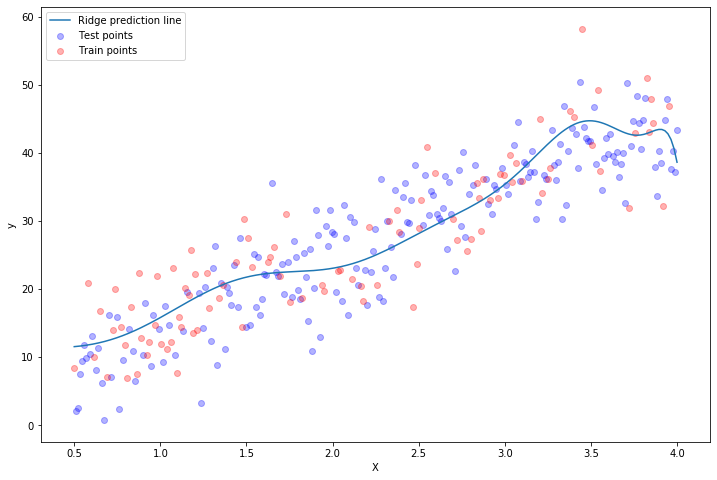

In [19]:
poly = PolynomialFeatures(degree=15, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_linspace_poly = poly.fit_transform(np.linspace(0.5,4,200).reshape(-1,1))

reg = Ridge(alpha = logspace[15], fit_intercept=True)
reg.fit(X_train_poly, y_train)
y_pred_linspace = reg.predict(X_linspace_poly)

plt.figure(figsize=(12, 8))
plt.plot(np.linspace(0.5,4,200), y_pred_linspace, label='Ridge prediction line')
plt.scatter(X_test, y_test, alpha=.3, c='b', label='Test points');
plt.scatter(X_train, y_train, alpha=.3, c='r', label='Train points');
plt.legend();
plt.xlabel('X')
plt.ylabel('y');

### Regularization is not a silver bullet

We do not get a perfect line, but sometimes it helps, compare to Linear Regression without regularization.

/Users/dmitrii/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.99723e-20): result may not be accurate.
  overwrite_a=True).T


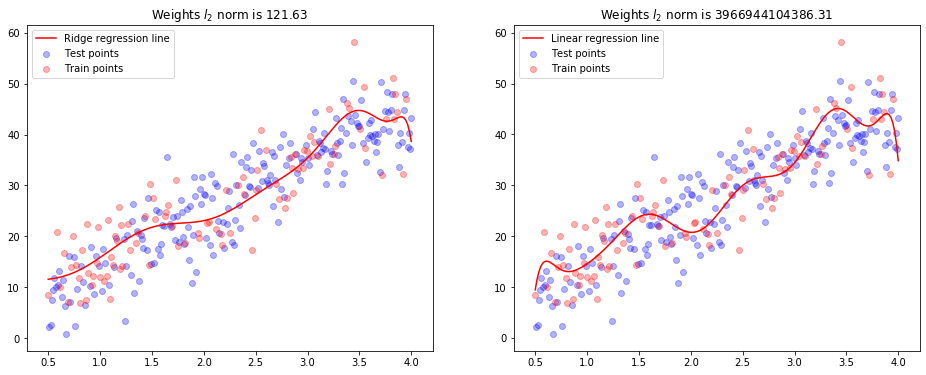

In [20]:
reg = Ridge(alpha = logspace[15], fit_intercept=True)
reg.fit(X_train_poly, y_train)
y_pred_linspace = reg.predict(X_linspace_poly)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].plot(np.linspace(0.5,4,200), y_pred_linspace,c='r',label='Ridge regression line')
ax[0].scatter(X_test, y_test, alpha=.3, c='b', label='Test points');
w_norm_ridge = np.round(np.sum(reg.coef_**2), 2)
ax[0].set_title(f'Weights $l_2$ norm is {w_norm_ridge}')
ax[0].scatter(X_train, y_train, alpha=.3, c='r', label='Train points');
ax[0].legend()
reg = LinearRegression(fit_intercept=False)
reg.fit(X_train_poly, y_train)
y_pred_linspace = reg.predict(X_linspace_poly)


w_norm_lr = np.round(np.sum(reg.coef_**2), 2)
ax[1].set_title(f'Weights $l_2$ norm is {w_norm_lr}')
ax[1].plot(np.linspace(0.5,4,200), y_pred_linspace,c='r', label='Linear regression line')
ax[1].scatter(X_test, y_test, alpha=.3,c='b', label='Test points');
ax[1].scatter(X_train, y_train, alpha=.3, c='r', label='Train points');
ax[1].legend();

# 2. K nearest kneighbors

> Complexity controlling parameter: number of neighbours, `n_neighbours`

In [19]:
from sklearn.neighbors import KNeighborsRegressor

### 2.1 Prediction curve

In [20]:
def plot_graph(reg, title):
    # Train a model
    reg.fit(X_train, y_train)

    # Predict on a test data
    X_linspace = np.linspace(0.5,4,1000)[:, np.newaxis]
    y_pred_linspace = reg.predict(X_linspace)


    # Plot prediction curve
    plt.figure(figsize=(12, 8))
    plt.plot(X_linspace, y_pred_linspace, alpha=.3)
    for x1, x2, y1, y2 in zip(X_linspace[:-2], X_linspace[1:], y_pred_linspace[:-2], y_pred_linspace[1:]):
        if np.allclose(y1, y2):
            plt.plot([x1,x2], [y1,y2], c='r', lw=3)
        if (x1 <=3.2) and (x2 >=3.2):
            plt.scatter(3.2, y1, s=100, c='green', marker='x')
            plt.scatter(3.2, y1, s=140, edgecolors='green', facecolors='none')
    plt.plot([x1,x2], [y1,y2], c='r', lw=3, label='Prediction curve')
    plt.vlines(3.2,6, 60, colors='green', linestyles='--')
    plt.ylim(6, 60)

    plt.scatter(X_test, y_test, alpha=.3, c='b', label='Test points');
    plt.scatter(X_train, y_train, alpha=.3, c='r', label='Train points');
    plt.legend(loc='upper left');
    plt.title(f'{title}')

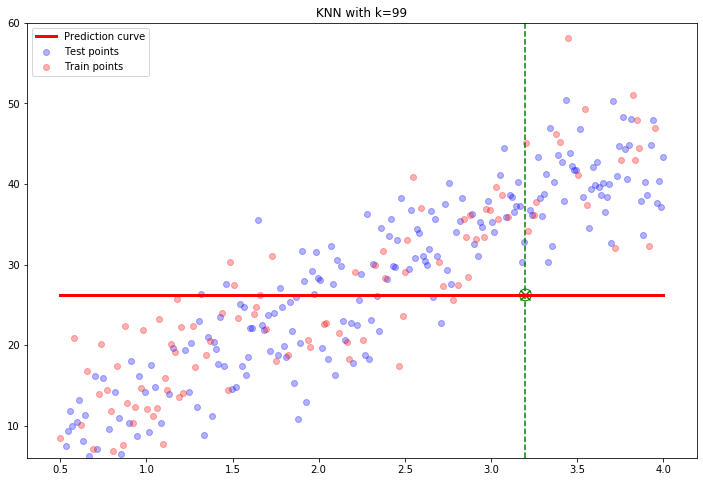

In [21]:
# Change number of neighbours from 99 to 1

n=99
reg = KNeighborsRegressor(n_neighbors=n)

plot_graph(reg, title=f'KNN with k={n}')

### 2.2 Error curves

In [22]:
test_error = []
train_error = []
n=50
for n_neighbours in range(1, n):
        
    reg = KNeighborsRegressor(n_neighbours)
    reg.fit(X_train, y_train)
    y_pred_train = reg.predict(X_train)
    y_pred_test = reg.predict(X_test)
    
    train_error.append(mse(y_pred_train, y_train))
    test_error.append(mse(y_pred_test, y_test))

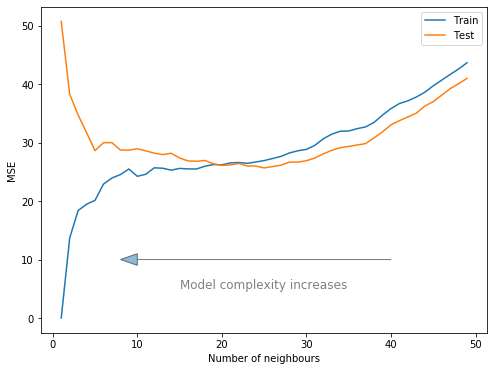

In [23]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, n), train_error, label='Train')
plt.plot(range(1, n), test_error, label='Test')
plt.legend();
plt.arrow(40, 10, -30, 0, head_width=2, head_length=2, alpha=.5)
plt.annotate('Model complexity increases', [15, 5], size=12, alpha=.5);
plt.xlabel('Number of neighbours')
plt.ylabel('MSE');

In [24]:
# Best model

n_neigh = list(range(1, n))[np.argmin(test_error)]
reg = KNeighborsRegressor(n_neighbors=n_neigh)
reg.fit(X_train, y_train)
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

print('Number of neighbours:',n_neigh, '\nTrain MSE:', mse(y_pred_train, y_train),'\nTest MSE:', mse(y_pred_test, y_test))

Number of neighbours: 25 
Train MSE: 26.93 
Test MSE: 25.67


# 3. Regression Tree

> Complexity controlling parameter: depth of the tree, `max_depth`

In [25]:
from sklearn.tree import DecisionTreeRegressor

### 3.1 Prediction curve

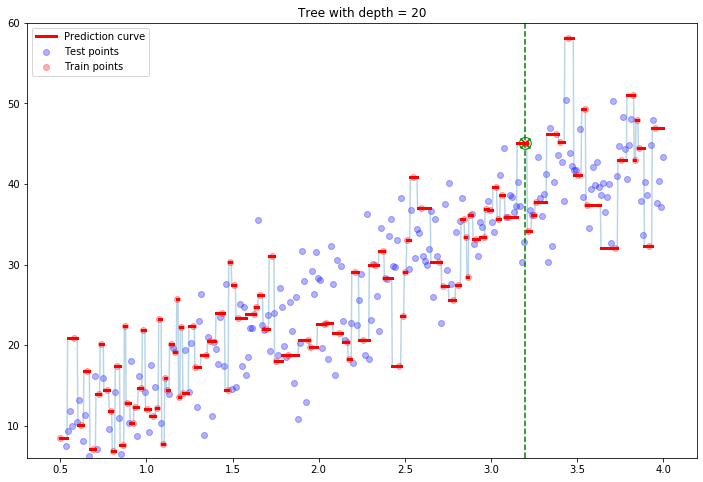

In [26]:
# Change max_depth from 1 to 20

depth=20
reg = DecisionTreeRegressor(max_depth=depth)

plot_graph(reg, title=f'Tree with depth = {depth}')

### 3.2 Error curves

In [27]:
test_error = []
train_error = []
n=20
for depth in range(1, n):
        
    reg = DecisionTreeRegressor(max_depth=depth)
    reg.fit(X_train, y_train)
    y_pred_train = reg.predict(X_train)
    y_pred_test = reg.predict(X_test)
    
    train_error.append(mse(y_pred_train, y_train))
    test_error.append(mse(y_pred_test, y_test))

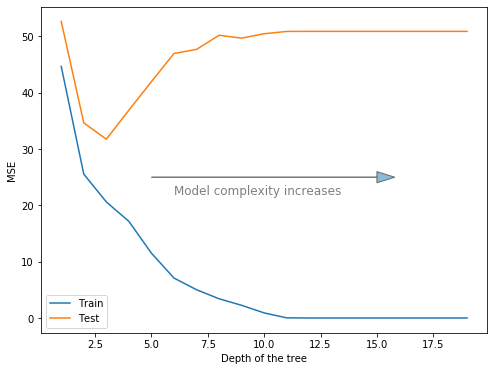

In [28]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, n), train_error, label='Train')
plt.plot(range(1, n), test_error, label='Test')
plt.legend();
plt.arrow(5, 25, 10, 0, head_width=2, head_length=.8, alpha=.5)
plt.annotate('Model complexity increases', [6, 22], size=12, alpha=.5);
plt.xlabel('Depth of the tree')
plt.ylabel('MSE');

In [29]:
# Best model

depth = list(range(1, n))[np.argmin(test_error)]
reg = DecisionTreeRegressor(max_depth=depth)
reg.fit(X_train, y_train)
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

print('Depth of the tree:',n_neigh, '\nTrain MSE:', mse(y_pred_train, y_train),'\nTest MSE:', mse(y_pred_test, y_test))

Depth of the tree: 25 
Train MSE: 20.61 
Test MSE: 31.75
